In [1]:
import os
import torch
import numpy as np
import setup.dataset as dataset
import setup.model as model
import setup.model2 as model2
import setup.classifier as classifier
import setup.plot as plot
from torch.utils.data import SubsetRandomSampler

np.random.seed(0)

DATASET_PATH = 'png_dataset'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
def sampler_indices(length):
    indices = list(range(length))
    np.random.shuffle(indices)
    split = int(np.floor(0.1 * length))
    train_indices, test_indices = indices[split:], indices[:split]
    return train_indices, test_indices

In [3]:
tumor_dataset = dataset.TumorDataset(DATASET_PATH)

train_indices, test_indices = sampler_indices(len(tumor_dataset))
train_sampler, test_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(tumor_dataset, batch_size=1, sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(tumor_dataset, batch_size=1, sampler=test_sampler)

In [4]:
FILTER_LIST = [16,32,64,128,256]
unet_model = model.DynamicUNet(FILTER_LIST).to(device)
# unet_model = model2.ONet(FILTER_LIST)
unet_classifier = classifier.TumorClassifier(unet_model, device)

In [6]:
unet_model.train()
unet_classifier.train(train_loader, learning_rate=0.001, epochs=100, name='ouputs/state_dict_model.pt')

Starting...

Epoch 1/40:
Loss:0.7946730
Time 0h 8m

Epoch 2/40:
Loss:0.7675950
Time 0h 8m
Saved

Epoch 3/40:
Loss:0.7727401
Time 0h 8m

Epoch 4/40:
Loss:0.7946545
Time 0h 8m

Epoch 5/40:
Loss:0.7648993
Time 0h 8m
Saved

Epoch 6/40:
Loss:0.7440992
Time 0h 8m
Saved

Epoch 7/40:
Loss:0.7426344
Time 0h 8m
Saved

Epoch 8/40:
Loss:0.7360510
Time 0h 8m
Saved

Epoch 9/40:
Loss:0.7403291
Time 0h 8m

Epoch 10/40:
Loss:0.7328801
Time 0h 8m
Saved

Epoch 11/40:
Loss:0.7226522
Time 0h 8m
Saved

Epoch 12/40:
Loss:0.7325263
Time 0h 8m

Epoch 13/40:
Loss:0.7210552
Time 0h 9m
Saved

Epoch 14/40:
Loss:0.7165074
Time 0h 8m
Saved

Epoch 15/40:
Loss:0.7361008
Time 0h 8m

Epoch 16/40:
Loss:0.6949983
Time 0h 8m
Saved

Epoch 17/40:
Loss:0.7232745
Time 0h 8m

Epoch 18/40:
Loss:0.7275200
Time 0h 8m

Epoch 19/40:
Epoch    19: reducing learning rate of group 0 to 1.0000e-03.
Loss:0.7010209
Time 0h 8m

Epoch 20/40:
Loss:0.6433424
Time 0h 8m
Saved

Epoch 21/40:
Loss:0.6368193
Time 0h 8m
Saved

Epoch 22/40:
Loss:0.62

In [5]:
unet_classifier.model.load_state_dict(torch.load('outputs/state_dict_model.pt'))
# unet_classifier.model.load_state_dict(torch.load('state_dict_modelONet.pt'))


<All keys matched successfully>

In [6]:
i=0

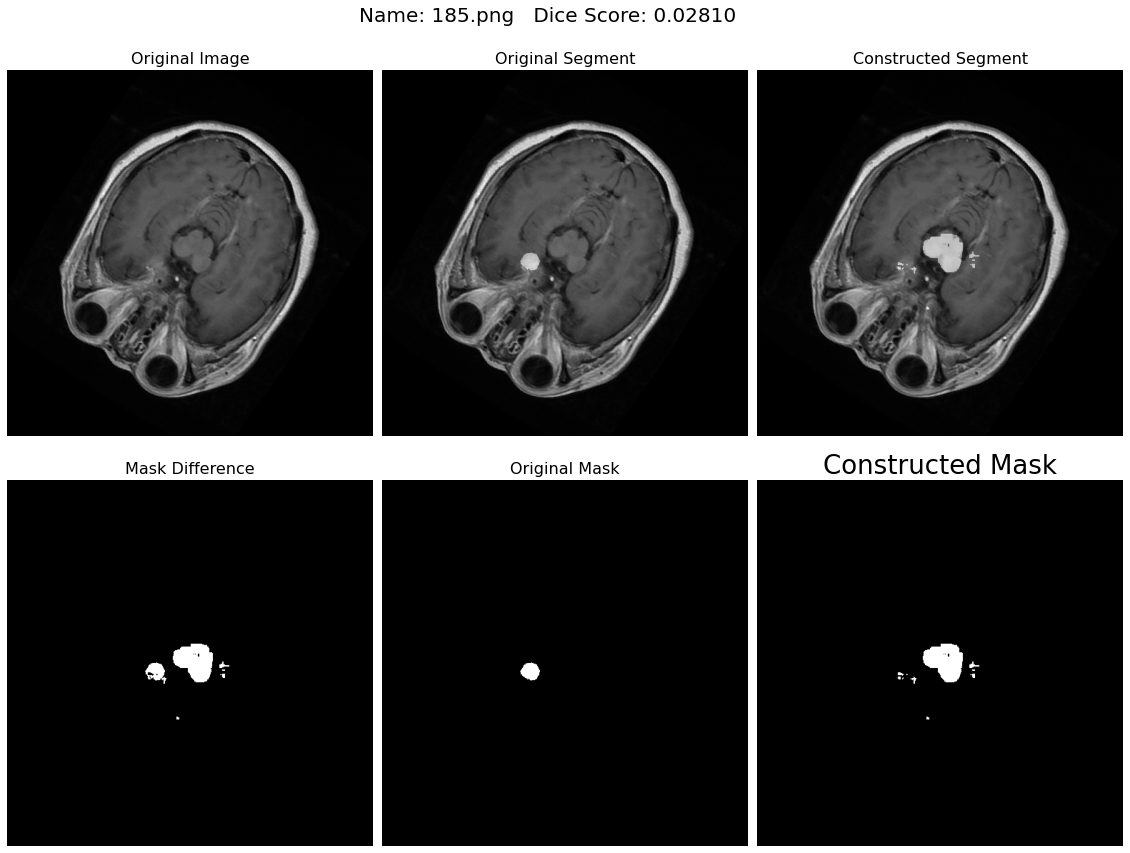

In [23]:
image_index = train_indices[i]
sample = tumor_dataset[image_index]
image, mask, output, d_score = unet_classifier.predict(sample,0.65)
title = f'Name: {image_index}.png   Dice Score: {d_score:.5f}'
# save_path = os.path.join('images',f'{d_score:.5f}_{image_index}.png')
plot.result(image,mask,output,title)
i += 1
if i >= len(test_indices):
    i = 0 

In [7]:
unet_model.eval()
unet_score = unet_classifier.test(test_loader)
print(f'\n\nDice Score {unet_score}')



Dice Score 0.5182395537749134
